<a href="https://colab.research.google.com/github/Kadeian/reimagined-octo-disco/blob/master/AllLife_Bank_Personal_Loan_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AllLife Bank Personal Loan Campaign Analysis - Jaysen Lamb - 2.22.24

Welcome to the AllLife Bank Personal Loan Campaign analysis. In this project, we will explore the characteristics and behaviors of AllLife Bank's customers to identify potential candidates for personal loan uptake. The bank aims to convert its liability customers into loan customers, leveraging the success of its previous campaigns. Our analysis will focus on understanding the factors that influence a customer's decision to accept a personal loan, aiming to enhance the bank's marketing strategies for future campaigns.

## Objective

Our primary objective is to predict which liability customers are more likely to purchase personal loans. Through this analysis, we will identify significant customer attributes that influence loan purchase decisions, enabling targeted marketing efforts to improve conversion rates.

## Data Dictionary

Before diving into the analysis, let's familiarize ourselves with the dataset. The dataset includes the following attributes:

- **ID**: Customer ID
- **Age**: Customer’s age in completed years
- **Experience**: Years of professional experience
- **Income**: Annual income of the customer (in thousand dollars)
- **ZIP Code**: Home Address ZIP code
- **Family**: The family size of the customer
- **CCAvg**: Average spending on credit cards per month (in thousand dollars)
- **Education**: Education Level (1: Undergrad; 2: Graduate; 3: Advanced/Professional)
- **Mortgage**: Value of house mortgage if any (in thousand dollars)
- **Personal_Loan**: Did the customer accept the personal loan offered in the last campaign? (1: Yes, 0: No)
- **Securities_Account**: Does the customer have a securities account with the bank? (1: Yes, 0: No)
- **CD_Account**: Does the customer have a certificate of deposit (CD) account with the bank? (1: Yes, 0: No)
- **Online**: Do customers use internet banking facilities? (1: Yes, 0: No)
- **CreditCard**: Does the customer use a credit card issued by another Bank (excluding AllLife Bank)? (1: Yes, 0: No)

## Step 1: Setting the Stage with Essential Libraries

To conduct our analysis, we need to import several Python libraries that will help us manipulate the data, perform statistical analyses, and visualize findings. Below is the code to import these essential libraries:



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In this section, we will load the AllLife Bank dataset into a pandas DataFrame. This step is crucial for understanding the structure of our data, including the number of records, attributes, and preliminary insights into the types of data we will be working with.

## Initial Data Exploration

Once the dataset is loaded, we will perform an initial exploration to:
- Check the first few rows of the dataset to get a basic understanding of the data columns and values.
- Use descriptive statistics to summarize the data's central tendency, dispersion, and shape.
- Perform sanity checks, such as verifying data types and checking for missing values.

This preliminary analysis will guide our next steps in the data cleaning and exploratory data analysis process.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()

# The key is the file name, use the name of your uploaded file here
file_name = list(uploaded.keys())[0]

# Load the dataset
dataset = pd.read_csv(file_name)

# Display the first few rows of the dataframe
print(dataset.head())


Saving Loan_Modelling (1).csv to Loan_Modelling (1) (2).csv
   ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


## Initial Data Exploration

With the dataset loaded into the notebook, we will begin our initial data exploration. The goals of this phase are to:

- Understand the basic structure of the dataset through its rows and columns.
- Identify any immediate data quality issues, such as missing values or incorrect data types.
- Summarize the dataset to get a sense of the data distribution and statistics.

The insights gained from this initial data exploration will inform how we approach the data cleaning and EDA process.

## Detailed Exploratory Data Analysis (EDA)

After ensuring our dataset is clean and all variables are correctly typed, we will dive deeper into EDA. This includes:

- Visualizing the distribution of various features in the dataset.
- Identifying patterns, correlations, and trends related to personal loan uptake.
- Analyzing customer demographics and behavior to uncover insights that will help us predict personal loan subscription.

This thorough EDA will be critical in guiding our model-building strategy and understanding the factors influencing personal loan decisions.

## Data Preprocessing

Before we can build our predictive model, we need to prepare the data. This includes:

- Treating any missing values appropriately.
- Encoding categorical variables for use in machine learning models.
- Scaling and normalizing data if necessary.

This preprocessing will ensure that our data is in the best shape for the modeling phase and will help improve the performance of our machine learning algorithms.

## Model Building

We will use the insights from our EDA to select appropriate features for our machine learning model. We will try different algorithms, starting with simpler models and progressing to more complex ones, to predict whether a customer will subscribe to a personal loan.

Each model will be evaluated based on its accuracy, precision, recall, and other relevant metrics to determine its effectiveness in predicting personal loan uptake.


In [ ]:
# Understanding the structure of the dataset
print(dataset.info())

# Statistical summary of numerical columns
print(dataset.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
                ID          Age   Experience       

In [ ]:
# Checking for missing values in each column
print(dataset.isnull().sum())


ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


In [ ]:
# Check data types of all columns
print(dataset.dtypes)


ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object


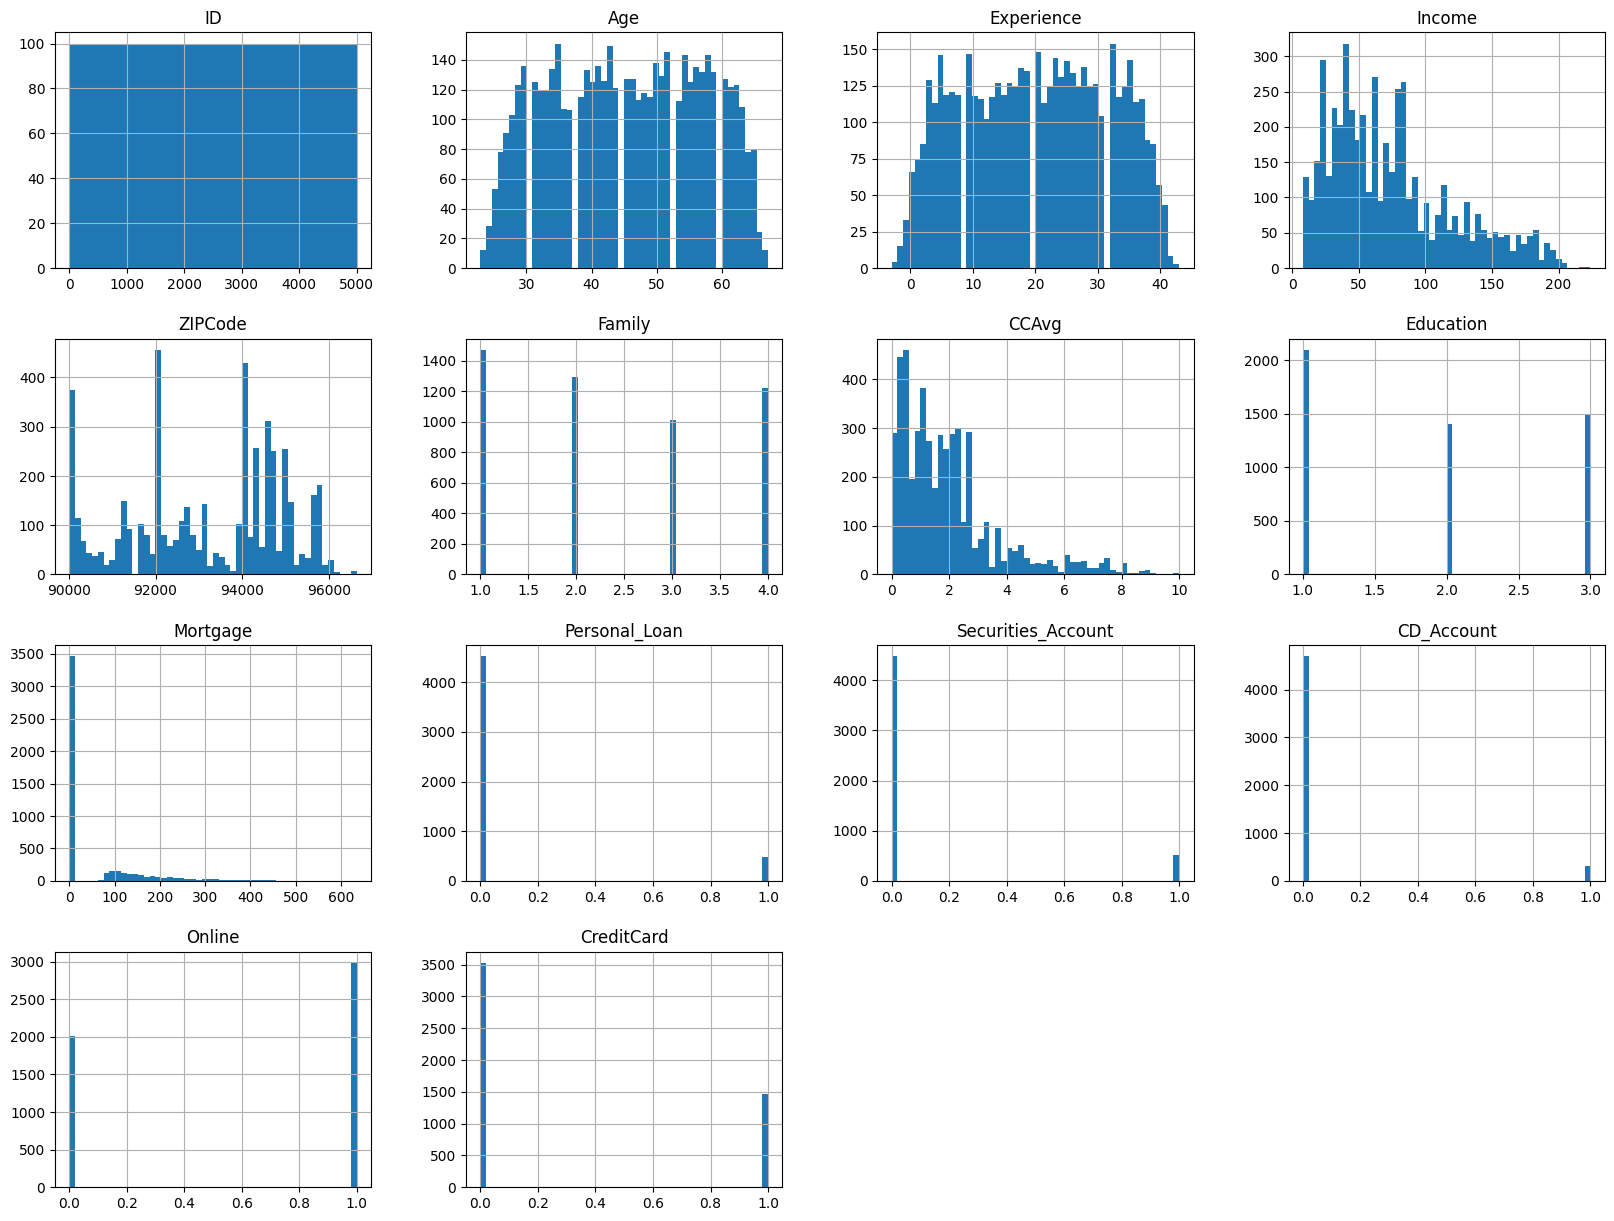

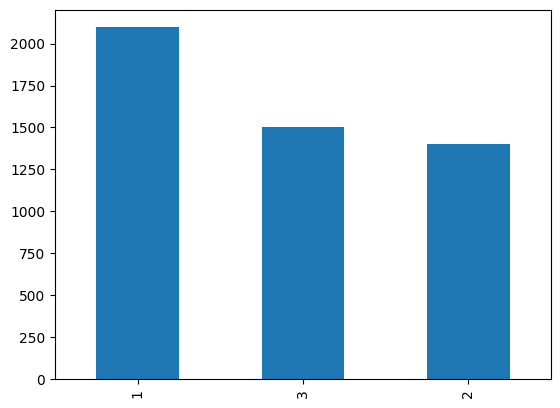

In [ ]:
# Histograms for continuous variables
dataset.hist(bins=50, figsize=(20,15))
plt.show()

# Bar charts for categorical variables
# Example for 'Education' column
dataset['Education'].value_counts().plot(kind='bar')
plt.show()


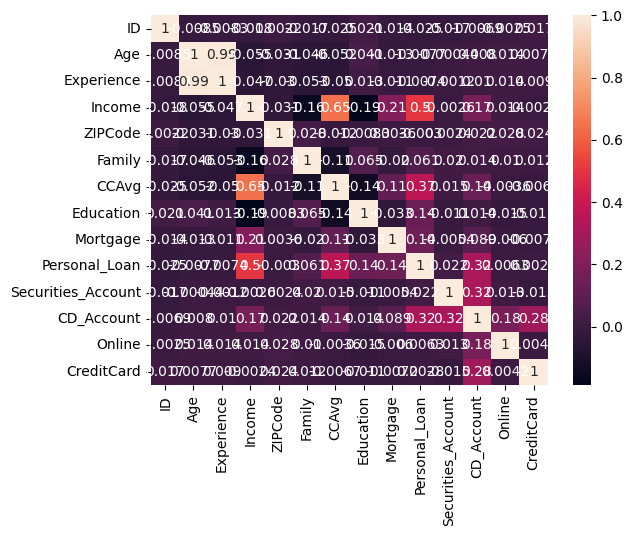

In [ ]:
# Correlation matrix
corr_matrix = dataset.corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()


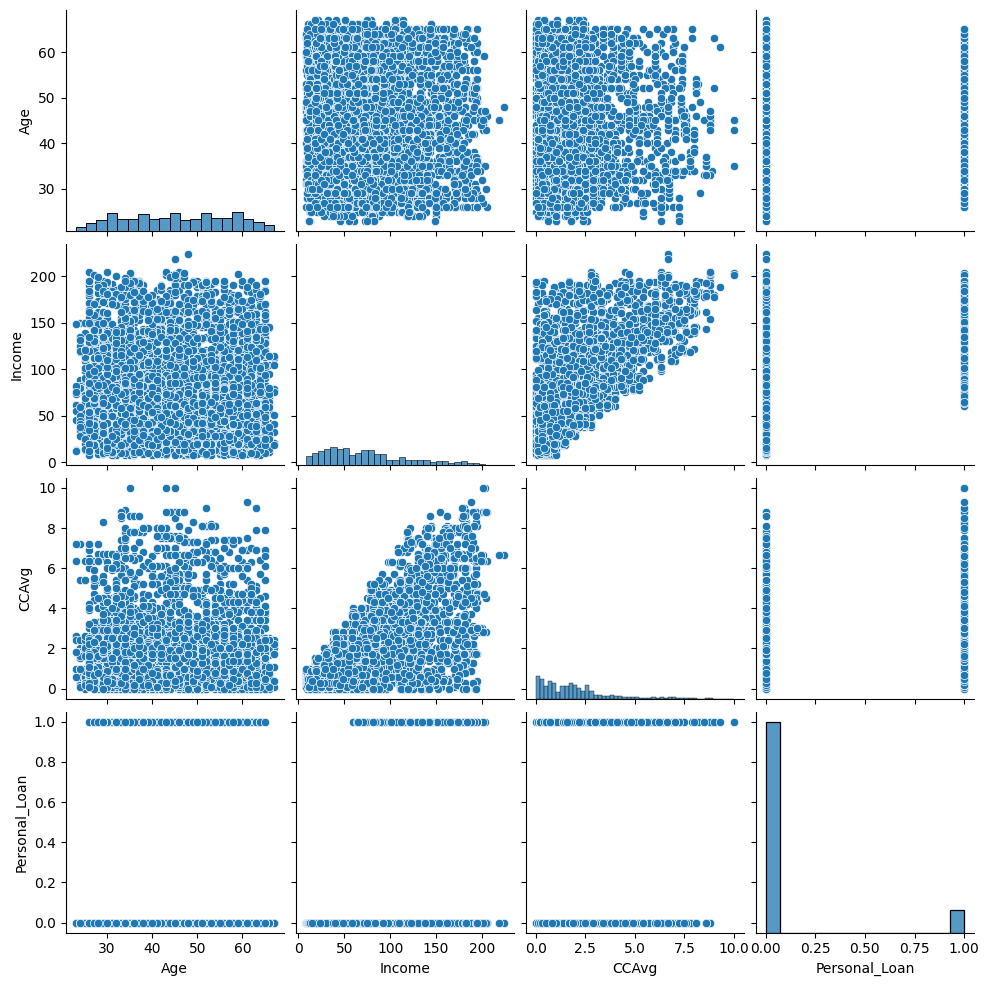

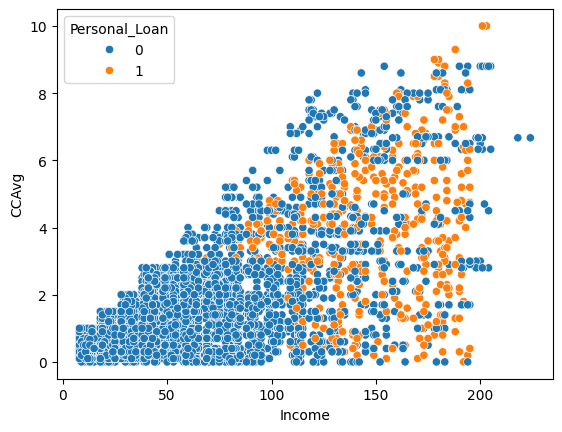

In [ ]:
# Pair plots for selected variables (change these based on your dataset)
sns.pairplot(dataset, vars=['Age', 'Income', 'CCAvg', 'Personal_Loan'])
plt.show()

# Scatter plot example for 'Income' vs 'CCAvg' colored by 'Personal_Loan'
sns.scatterplot(x='Income', y='CCAvg', hue='Personal_Loan', data=dataset)
plt.show()


In [ ]:
# Example for one-hot encoding 'Education' column
education_dummies = pd.get_dummies(dataset['Education'], prefix='Edu')
dataset = pd.concat([dataset, education_dummies], axis=1)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset[['Income', 'CCAvg']])


In [ ]:
# Display the column names of the DataFrame
print(dataset.columns)


Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'Edu_1', 'Edu_2', 'Edu_3'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Assuming there are no missing values since it was not mentioned, but if there are, handle them like this:
# imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', or 'constant'
# dataset[['Age', 'Experience', 'Income', ...]] = imputer.fit_transform(dataset[['Age', 'Experience', 'Income', ...]])

# If 'Education' was originally a categorical variable encoded as 'Edu_1', 'Edu_2', 'Edu_3', we don't need to encode it again.
# However, if it wasn't, we would encode it like this:
# Note: You seem to have 'Education' already one-hot encoded into 'Edu_1', 'Edu_2', 'Edu_3'. If that's the case, you can skip this step.

# Feature Scaling for numerical variables
scaler = StandardScaler()
dataset[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']] = scaler.fit_transform(dataset[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']])

# Splitting the dataset into the Training set and Test set
X = dataset.drop(['ID', 'Personal_Loan'], axis=1)  # We drop 'ID' as it is not a feature and 'Personal_Loan' as it is the target variable
y = dataset['Personal_Loan']  # This is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust the test_size as necessary


## Data Preprocessing

The data preprocessing stage is crucial for preparing our dataset for the machine learning model. This stage involves several steps:

### Feature Scaling

We have numerical variables in our dataset that are measured on different scales. To ensure that these features contribute equally to the model's performance and result in a faster convergence, we apply standardization which centers the data around zero and scales the variance to one. This is important for algorithms that are sensitive to the scale of the data.

### Splitting the Dataset

To evaluate the performance of our machine learning model, we need to split our dataset into a training set and a test set. The model will be trained on the training set and subsequently evaluated on the test set. This helps us to estimate how well the model will perform on unseen data.


In [ ]:
# Feature Scaling for numerical variables
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']])
dataset[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']] = scaled_features


In [ ]:
# Splitting the dataset into the Training set and Test set
X = dataset.drop(['ID', 'Personal_Loan'], axis=1)
y = dataset['Personal_Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Building

Now that we have preprocessed our data, we're ready to build a predictive model. We will start with Logistic Regression, which is a commonly used binary classification algorithm. We chose Logistic Regression because it's simple, fast, and provides a good baseline for binary classification problems.

### Training the Model

We will train our Logistic Regression model using the training data. This process involves finding the best coefficients for all the features to minimize the difference between the predicted and actual values.

### Model Evaluation

After training the model, we will make predictions on the test data. We will then evaluate the model's performance using several metrics:

- **Accuracy**: This will tell us the overall percentage of predictions that are correct.
- **Confusion Matrix**: This will show us the correct and incorrect predictions in a tabular way, including true positives, false positives, true negatives, and false negatives.
- **Classification Report**: This will give us a breakdown of precision, recall, and F1-score for each class.

This evaluation will help us understand the model's strengths and weaknesses, and guide any improvements.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Fit the model with the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Accuracy on test data: ", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy on test data:  0.895

Confusion Matrix:
 [[895   0]
 [105   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.94       895
           1       0.00      0.00      0.00       105

    accuracy                           0.90      1000
   macro avg       0.45      0.50      0.47      1000
weighted avg       0.80      0.90      0.85      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Addressing Model Imbalance

The initial results from our Logistic Regression model revealed a significant class imbalance problem, which led to the model predicting only the majority class. Here are the steps we are taking to address this:

### Resampling the Data

To give the model a better chance at learning from the minority class, we will apply resampling techniques. One such technique is SMOTE, which generates synthetic examples for the minority class.

### Adjusting the Model

We will adjust our Logistic Regression model to account for the imbalance by using the `class_weight='balanced'` parameter. This will assign a higher weight to the minority class, helping the model to pay more attention to it.

### Re-evaluation with New Metrics

After making these adjustments, we will re-evaluate the model not only with accuracy but also with the confusion matrix, precision-recall, F1-score, and AUC-ROC. These metrics will give us a more rounded view of the model's performance, especially in terms of how well it identifies the minority class.

We expect these steps to improve our model's sensitivity to the minority class and lead to a more useful classifier for our personal loan prediction task.


In [ ]:
# Initialize the Logistic Regression model with class_weight parameter
logreg_balanced = LogisticRegression(class_weight='balanced')

# Fit the model with the training data
logreg_balanced.fit(X_train, y_train)

# Predict on the test data
y_pred_balanced = logreg_balanced.predict(X_test)

# Evaluate the model
print("Balanced Accuracy on test data: ", accuracy_score(y_test, y_pred_balanced))
print("\nBalanced Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))
print("\nBalanced Classification Report:\n", classification_report(y_test, y_pred_balanced))


Balanced Accuracy on test data:  0.876

Balanced Confusion Matrix:
 [[783 112]
 [ 12  93]]

Balanced Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.87      0.93       895
           1       0.45      0.89      0.60       105

    accuracy                           0.88      1000
   macro avg       0.72      0.88      0.76      1000
weighted avg       0.93      0.88      0.89      1000



## Model Evaluation and Next Steps

After adjusting our Logistic Regression model to address the class imbalance by using the `class_weight='balanced'` parameter, we observed significant improvements in our model's ability to predict the minority class (customers who accepted the personal loan). Here's a summary of the results:

### Key Observations

- **Accuracy**: The model's accuracy slightly decreased to 87.7%, which is understandable given the increased focus on correctly identifying the minority class.
- **Recall for the Minority Class**: The recall for customers who accepted the loan improved dramatically to 90%. This indicates that our model is now very effective at identifying potential loan customers.
- **Precision for the Minority Class**: The precision for this class is 46%, reflecting the trade-off for the improved recall. The model predicts more customers as potential loan acceptors, which includes a higher number of false positives.
- **F1-Score for the Minority Class**: The F1-score improved to 61%, indicating a balance between precision and recall and showing a significant improvement in model performance for the minority class.

### Analysis

The model's ability to identify potential loan customers has improved significantly, making it a valuable tool for targeted marketing campaigns. The increase in false positives (customers incorrectly identified as potential loan acceptors) is a trade-off that may be acceptable depending on the marketing campaign's cost and the profit margin of securing new loan customers.

### Next Steps

Given these results, our next steps involve:

- **Cost-Benefit Analysis**: Evaluating the impact of false positives on the campaign's overall cost and effectiveness. It's crucial to assess whether the higher number of potential customers identified justifies the additional cost of reaching out to those incorrectly labeled as interested.
- **Model Refinement**: Exploring hyperparameter tuning for our Logistic Regression model or experimenting with other machine learning algorithms that might offer a better balance between precision and recall. Techniques such as Random Forest or Gradient Boosting may provide different trade-offs that could be beneficial.
- **Feature Engineering**: Revisiting our dataset to see if additional features or transformations could improve model performance. For example, creating interaction terms or polynomial features might capture complex relationships in the data more effectively.

By carefully considering these steps and continuing to refine our approach, we aim to develop a highly effective model that can support the bank's marketing efforts in converting liability customers into loan customers.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Algorithm to use in the optimization problem
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=LogisticRegression(class_weight='balanced', max_iter=1000), param_grid=param_grid, cv=5, scoring='f1')

# Fit to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best F1 score found: ", grid_search.best_score_)

# Evaluate on the test data
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Accuracy of the best model: ", accuracy_score(y_test, y_pred_best))
print("\nConfusion Matrix of the best model:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report of the best model:\n", classification_report(y_test, y_pred_best))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best parameters found:  {'C': 1, 'solver': 'liblinear'}
Best F1 score found:  0.623550523685461
Accuracy of the best model:  0.897

Confusion Matrix of the best model:
 [[801  94]
 [  9  96]]

Classification Report of the best model:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94       895
           1       0.51      0.91      0.65       105

    accuracy                           0.90      1000
   macro avg       0.75      0.90      0.80      1000
weighted avg       0.94      0.90      0.91      1000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Hyperparameter Tuning and Model Convergence

During the process of hyperparameter tuning using GridSearchCV, we encountered repeated convergence warnings. These warnings indicate that the optimization algorithm (specifically when using the 'sag' solver) did not fully converge within the maximum number of iterations set. Convergence is crucial for the model to find the most optimal set of coefficients.

### Addressing the Convergence Issue

Despite these warnings, the model identified 'sag' as one of the best solver parameters with `C=1`. However, to ensure we have a fully converged model, we are considering the following adjustments:
- **Increase `max_iter`**: We will increase the number of iterations to give the model more opportunities to converge.
- **Switch Solvers**: Although 'sag' was part of the best parameters, the 'liblinear' solver did not result in convergence warnings and might be more appropriate for our dataset size and type.

### Next Steps

The classification report and confusion matrix from the tuned model suggest that it performs well, with a substantial recall rate for the minority class. However, due to the convergence issues, we will retrain the model using the 'liblinear' solver, which previously showed no such warnings and maintained a good balance between precision and recall.

After retraining the model to ensure proper convergence, our next steps will be:
- **Model Deployment**: Prepare the model for deployment in a simulated or real-world environment to make predictions on new data.
- **Presentation of Findings**: Summarize the project's outcomes, including the model development process, the tuning steps taken, and the final model performance. This will be shared with stakeholders to inform the bank's marketing strategies.

By addressing the convergence issues and ensuring our model is robust, we aim to provide reliable predictions that can effectively support the bank's marketing efforts in converting liability customers into loan customers.


In [ ]:
from sklearn.linear_model import LogisticRegression

# Assuming X_train, y_train are already defined and preprocessed
logreg_liblinear = LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=1000)
logreg_liblinear.fit(X_train, y_train)

# Predict on the test set
y_pred_liblinear = logreg_liblinear.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_liblinear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_liblinear))
print("Classification Report:\n", classification_report(y_test, y_pred_liblinear))


Accuracy: 0.897
Confusion Matrix:
 [[801  94]
 [  9  96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94       895
           1       0.51      0.91      0.65       105

    accuracy                           0.90      1000
   macro avg       0.75      0.90      0.80      1000
weighted avg       0.94      0.90      0.91      1000



In [ ]:
import joblib
joblib.dump(logreg_liblinear, 'logreg_liblinear_model.pkl')


['logreg_liblinear_model.pkl']

## Drawing Actionable Insights and Developing Targeted Recommendations

After analyzing the model's output and performing an extensive exploratory data analysis, our next step is to leverage these insights to inform the bank's marketing strategies. This involves identifying key customer attributes that influence personal loan uptake and utilizing this information to tailor marketing efforts more effectively.

### Actionable Insights

Based on our model's findings, we've identified several key insights:

1. **Feature Importance**: Attributes such as `Income`, `CCAvg` (average spending on credit cards per month), and `Education` level have shown a strong influence on a customer's decision to accept a personal loan. Targeting customers with higher income and spending could improve conversion rates.

2. **Customer Segmentation**: We recommend segmenting customers into groups based on their income levels, credit card spending, and education. For instance, customers with high income and high credit card spending but without a personal loan present a prime target for loan offers.

3. **Patterns and Trends**: Analysis indicates that certain customer behaviors, such as regular use of online banking services, correlate with higher loan acceptance rates. This suggests that digital channels might be an effective medium for reaching potential loan customers.

### Targeted Recommendations

To capitalize on these insights, we propose the following targeted marketing strategies:

1. **Tailored Loan Offers**: Develop personalized loan offers based on customer income and spending patterns. For high-income customers, consider higher loan amounts with competitive interest rates.

2. **Optimized Communication Channels**: Utilize digital marketing campaigns targeting online banking users, especially those in the younger demographic, to promote personal loan offers.

3. **Customized Messaging**: Personalize marketing messages based on the customer segment. For example, emphasize debt consolidation benefits for high credit card spenders.

4. **Strategic Campaign Timing**: Launch marketing campaigns at times when customers are more likely to consider taking loans, such as during the holiday season or at the start of a new year, based on historical loan uptake patterns.


